<a href="https://colab.research.google.com/github/tsangrebecca/BloomTech/blob/main/Sprint6/Module3/O2_UseScikitlearnForHyperparameterOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary modules
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve

In [2]:
# Load the digits data

# The deafult with 10 classes (digits 0-9)
digits = datasets.load_digits(n_class=10)

# Create the feature matrix
X = digits.data
print('The shape of the feature matrix: ', X.shape)

# Create the target array
y = digits.target
print('The shape of the target array: ', y.shape)
print('The unique classes in the target: ', np.unique(y))

The shape of the feature matrix:  (1797, 64)
The shape of the target array:  (1797,)
The unique classes in the target:  [0 1 2 3 4 5 6 7 8 9]


In [3]:
# Create the validation_curve
depth = range(1, 30, 3)
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(), X, y, param_name="max_depth", param_range=depth,
    scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

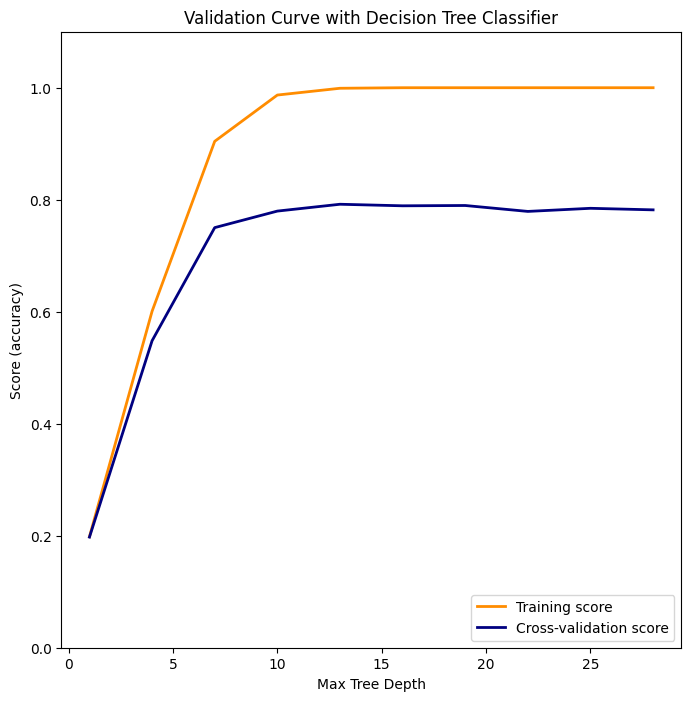

In [4]:
# Plot the validation curve
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8,8))

ax.plot(depth, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
ax.plot(depth, test_scores_mean, label="Cross-validation score",
             color="navy", lw=2)

ax.set_title("Validation Curve with Decision Tree Classifier")
ax.set_xlabel("Max Tree Depth")
ax.set_ylabel("Score (accuracy)")
ax.set_ylim(0.0, 1.1)

ax.legend(loc='lower right')

plt.show()

fig.clf()

In [5]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Setup the hyperparameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X, y)

# Print the tuned hyperparameters and score
print("Tuned Decision Tree Hyperparameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 4}
Best score is 0.7195496750232127


In [6]:
# Display cv results by ranking the test scores
import pandas as pd
pd.DataFrame(tree_cv.cv_results_).sort_values(by='rank_test_score').T

,4,7,2,0,8,9,5,3,6,1
mean_fit_time,0.002155,0.002486,0.002337,0.00191,0.00129,0.001317,0.000886,0.001102,0.000892,0.000808
std_fit_time,0.000148,0.000074,0.000481,0.000367,0.000075,0.000073,0.000203,0.000231,0.000068,0.000111
mean_score_time,0.000479,0.00049,0.000754,0.000512,0.000437,0.000446,0.000425,0.00049,0.000406,0.000407
std_score_time,0.000023,0.000031,0.000162,0.000067,0.000013,0.000007,0.00003,0.000088,0.000015,0.000011
param_criterion,gini,entropy,entropy,entropy,gini,entropy,entropy,entropy,entropy,gini
param_max_depth,None,None,None,3,3,3,None,3,3,3
param_max_features,5,5,2,8,6,6,1,3,2,2
param_min_samples_leaf,4,3,3,1,7,7,8,5,2,7
params,"{'criterion': 'gini', 'max_depth': None, 'max_...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'entropy', 'max_depth': 3, 'max_...","{'criterion': 'gini', 'max_depth': 3, 'max_fea...","{'criterion': 'entropy', 'max_depth': 3, 'max_...","{'criterion': 'entropy', 'max_depth': None, 'm...","{'criterion': 'entropy', 'max_depth': 3, 'max_...","{'criterion': 'entropy', 'max_depth': 3, 'max_...","{'criterion': 'gini', 'max_depth': 3, 'max_fea..."
split0_test_score,0.738889,0.741667,0.644444,0.577778,0.425,0.45,0.6,0.358333,0.308333,0.272222
